# Introduction

Project ini membahas tentang penerapan Supervised Machine Learning, yaitu metode Classification. Algoritma model klasifikasi yang digunakan adalah Logistic Regression, Support Vector Machine (SVM), Decision Tree, K-Nearest Neighbor, Random Forest, dan Naive Bayes. Tujuan dari project ini adalah mengevaluasi dan menerapkan metode klasifikasi pada Machine Learning. Data yang digunakan dalam project ini adalah dataset yang berisi kampanye pemasaran suatu institusi bank. Dataset ini terbagi menjadi empat. Berikut penjelasannya:

There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014].
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

Dalam project ini, dataset yang digunakan adalah dataset bank-additional-full.csv, kecuali pada algoritma SVM, karena pada algoritma SVM akan menggunakan dataset bank-additional.csv dengan jumlah observasi yang lebih kecil. Objektif dari klasifikasi menggunakan data ini adalah memprediksi apakah suatu klien bank akan berlangganan deposito berjangka (variabel y) berdasarkan atribut-atribut kampanye pemasaran yang dilakukan oleh suatu institusi bank.

Sumber: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Import Library

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Loading Data

In [3]:
df_bank_additional_full = pd.read_csv('bank-additional-full.csv', sep=';')
df_bank_additional = pd.read_csv('bank-additional.csv', sep=';')

In [4]:
# Menyalin data
df_bank_full = df_bank_additional_full.copy()
df_bank = df_bank_additional.copy()

In [5]:
# 5 data pertama
df_bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# 5 data terakhir
df_bank_full.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
# Memeriksa dimensi dataset (jml baris, jml kolom)
df_bank_full.shape

(41188, 21)

In [8]:
# Melihat ringkasan informasi pada dataset
df_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Berdasarkan yang sudah diketahui sebelumnya bahwa terdapat 41188 baris/observasi dan terdapat 21 kolom/atribut, di mana terdapat 10 kolom dengan tipe numerik dan 11 kolom dengan tipe kategorik.

## Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan eksplorasi data lebih lanjut. Proses ini bertujuan untuk melihat apakah didalam data terdapat nilai yang hilang atau missing values, nilai yang tidak signifikan satu sama lain, dan melihat apakah ada duplikasi dalam keseluruhan data.

In [10]:
# Memeriksa apakah ada duplikasi dalam data
df_bank_full.duplicated().sum()

12

In [11]:
# Memeriksa apakah ada missing value dalam data
df_bank_full.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Berdasarkan output di atas, diketahui bahwa terdapat 12 duplikasi dan tidak terdapat missing values, sehingga duplikasi dalam data akan dihapus.

In [12]:
# Menghapus duplikasi dalam data
df_bank_full.drop_duplicates(keep='last',inplace=True)

In [13]:
# Memeriksa again apakah masih ada duplikasi or not
df_bank_full.duplicated().sum()

0

In [14]:
# Mengembalikan nomor index pada data
df_bank_full.reset_index(inplace=True)
df_bank_full.drop('index',axis=1,inplace=True)

## Exploratory Data Analysis

Eksplorasi data dilakukan untuk memahami data lebih dalam, mengetahui variabel atau fitur apa saja yang diduga berpengaruh dalam prediksi variabel targetnya, dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan prediksi model.

In [15]:
# Frekuensi nilai pada variable y
df_bank_full['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

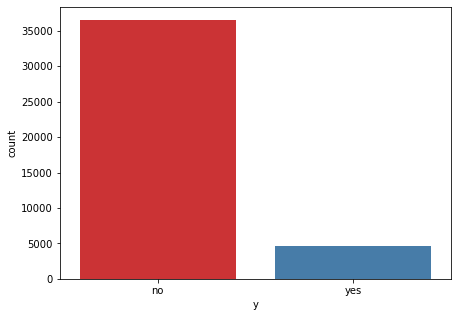

In [16]:
# Membuat visualisasi data 
f, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='y', data=df_bank_full, palette='Set1')
plt.show()

Berdasarkan output di atas, diketahui bahwa terdapat 36537 "no" dan terdapat 4639 "yes". Hal ini dapat diartikan bahwa, sebagian besar klien yang ditunjuk sebagai target kampanye pemasaran bank tersebut memilih untuk tidak berlangganan deposit berjangka, yaitu sebanyak 36537 klien. Di sisi lain, terdapat 4639 klien yang memilih untuk berlangganan deposit berjangka.

## Distribusi Statistik

In [17]:
df_bank_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


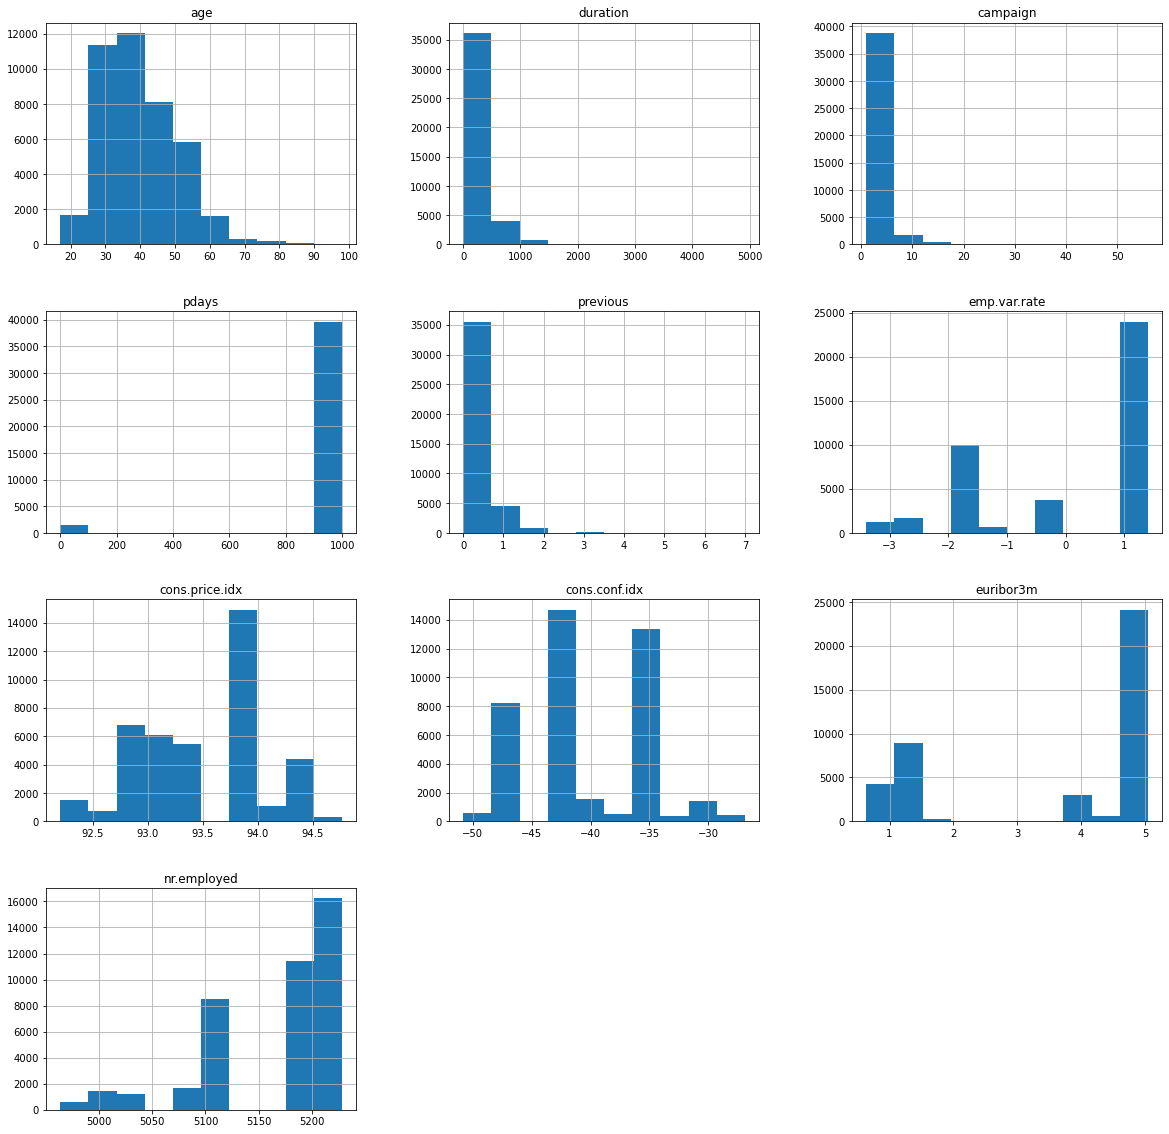

In [18]:
# Melihat visualisasi data menggunakan histogram
df_bank_full.hist(figsize=(20,20))
plt.show()

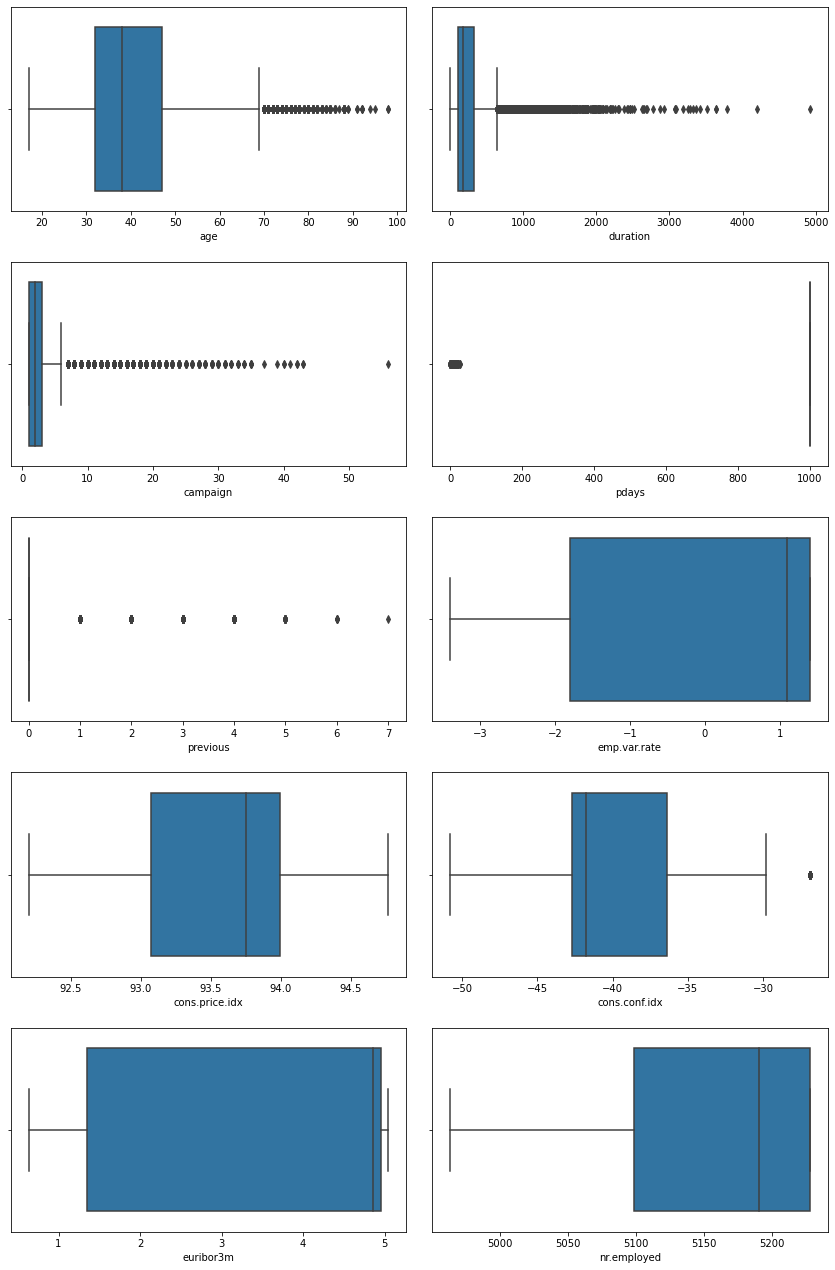

In [19]:
# Melihat visualisasi data menggunakan boxplot
cols=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(5,2,figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.boxplot(data=df_bank_full, x=col, ax=ax[i])
    
fig.tight_layout(pad=2.0)

Berdasarkan output plot nilai dan distribusi statistik masing-masing kolom numerik di atas, diketahui bahwa:

1. Rata-rata umur klien yang ditunjuk sebagai target kampanye pemasaran bank adalah 40 tahun dengan umur termuda 17 tahun dan umur tertuanya adalah 98 tahun. Jumlah klien terbanyak yang ditunjuk sebagai target adalah klien yang berumur sekiar 30-40 tahun.
2. Rata-rata durasi telepon terakhir bersama klien adalah sekitar 250 detik.
3. Kontak klien yang dihubungi dalam pelaksanaan kampanye ini adalah 2-3 kontak.
4. Kebanyakan klien tidak dihubungi atau tidak melakukan kontak pada saat kampanye sebelumnya. Hal ini ditandai dengan nilai 999 pada kolom campaign dan juga nilai 0 pada kolom previous yang mempunyai frekuensi tinggi.
5. Karakteristik sosial dan ekonomi pada saat kampanye juga disertakan dalam analisis untuk dilihat pengaruhnya pada keputusan klien dalam mengambil keputusan untuk berlangganan deposito berjangka, di mana jika dilihat dari distribusi frekuensi nilai karakteristik sosial dan ekonomi pada saat itu cukup bervariasi.

## Distribusi Statistik masing-masing kolom berdasarkan target y

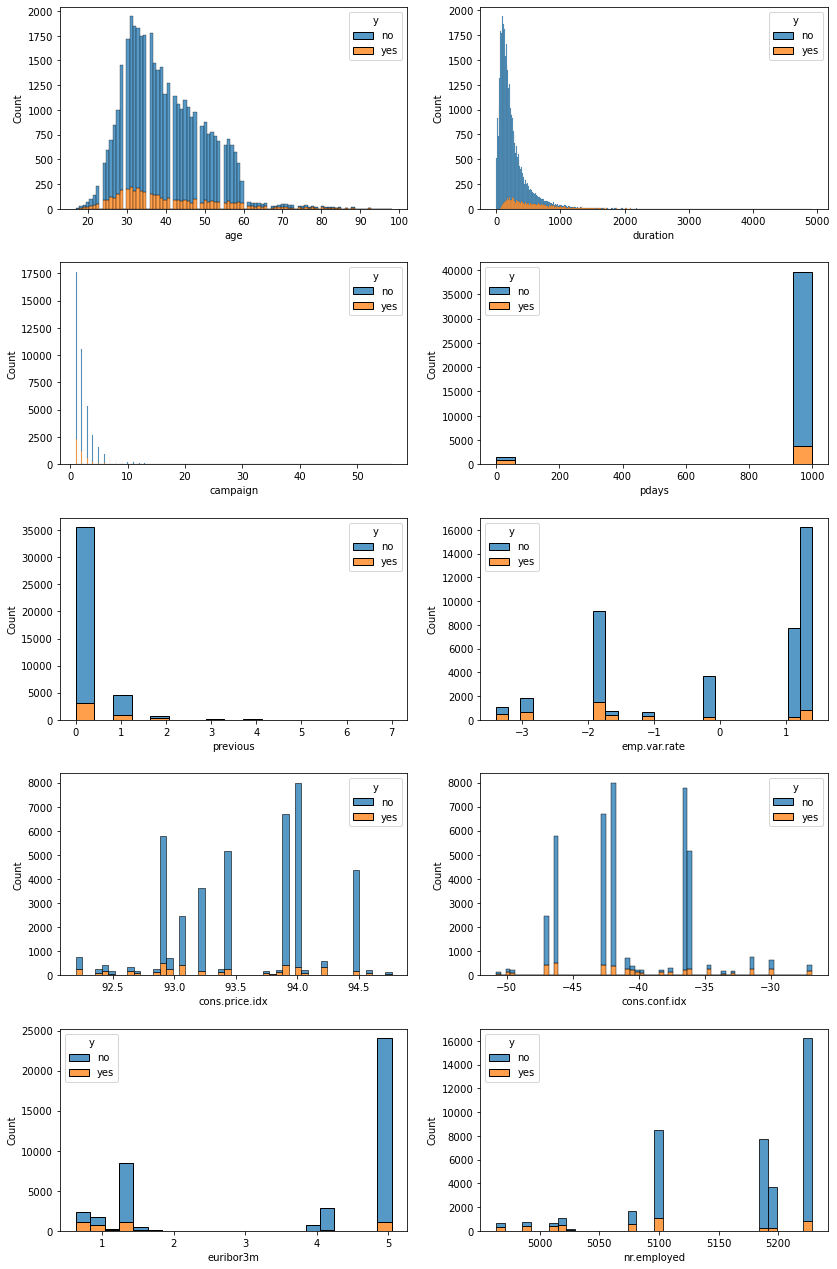

In [20]:
# Melihat visualisasi data menggunakan histogram
cols=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(5,2,figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.histplot(data=df_bank_full, x=col, hue='y', multiple='stack', ax=ax[i])
    
fig.tight_layout(pad=2.0)

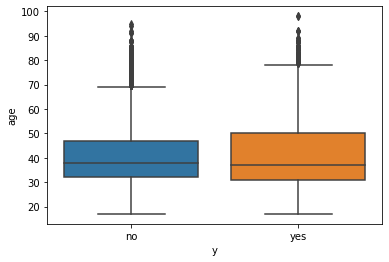

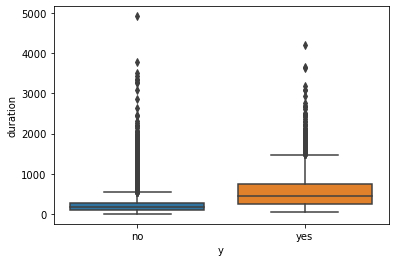

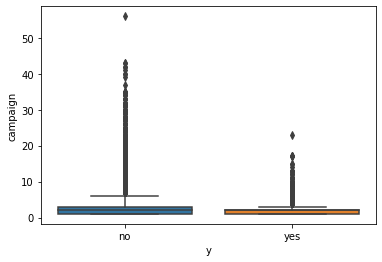

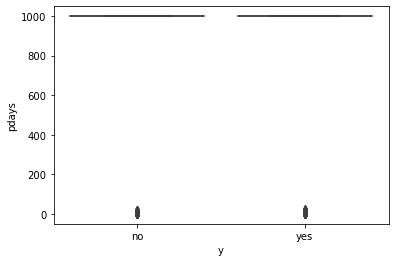

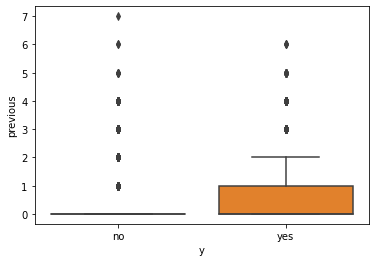

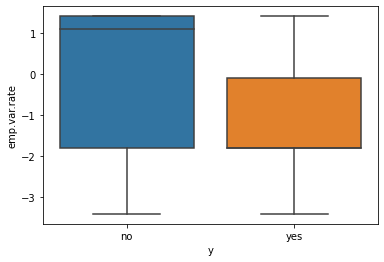

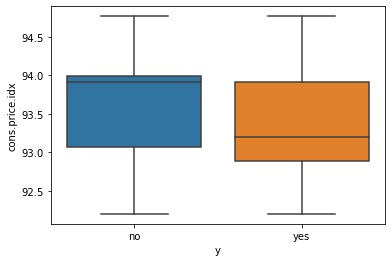

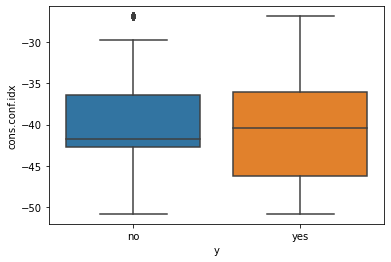

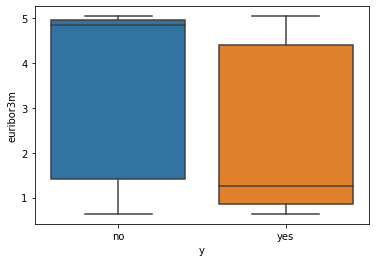

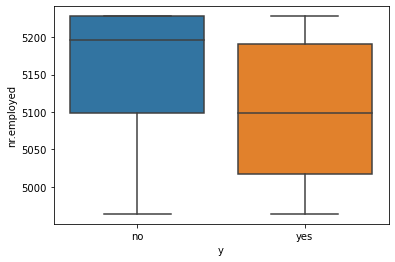

In [21]:
num_var = ["age","duration","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for i in num_var:
    sns.boxplot(x='y', y= i, data= df_bank_full)
    plt.show()

Berdasarkan plot distribusi statistik yang dikelompokkan berdasarkan nilai pada variabel y-nya, diketahui bahwa:

1. Kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien dengan umur 30-40 tahun.
2. Durasi dalam telepon yang dilakukan dengan klien semakin lama, kemungkinan klien untuk memilih berlangganan deposito berjangka semakin besar.

Untuk melihat pengaruh variabel numerik lain terhadap variabel y dapat lebih jelas menggunakan matriks korelasi.

## Corelation pada kolom numerik terhadap target y

In [22]:
# Mengubah nilai kolom y
mapping = {'yes':1,
          'no':0}
df_bank_full['y'] = df_bank_full['y'].map(mapping)

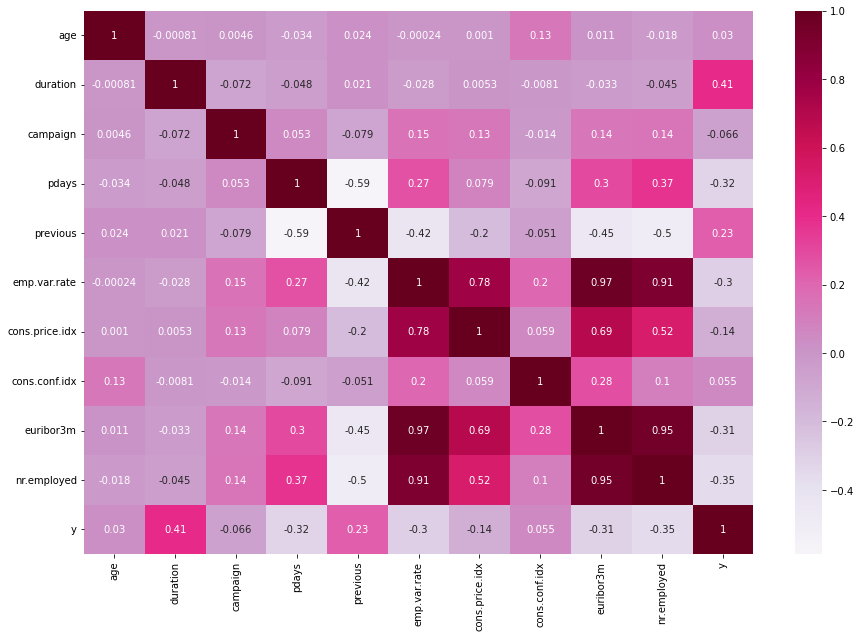

In [23]:
# Visualisasi menggunakan heatmap
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_bank_full.corr(), annot = True, cmap='PuRd')

Berdasarkan plot di atas, diketahui bahwa kolom Age, campaign, dan cons.conf.idx memiliki korelasi yang sangat rendah terhadap variabel y. Artinya umur klien, jumlah kontak yang dilakukan selama kampanye, dan consumer confidence index atau karakteristik ekonomi berupa kepercayaan konsumen cenderung tidak mempengaruhi keputusan klien dalam memilih akan berlangganan deposito berjangka atau tidak. Selain itu, kolom Duration memiliki korelasi yang paling tinggi terhadap variabel y yaitu sebesar 0.41. Ini menunjukkan bahwa durasi kontak terakhir yang dilakukan semakin panjang, maka kemungkinan klien untuk memilih berlangganan deposito berjangka akan semakin besar (hal ini juga membuktikan interpretasi secara grafis hubungan durasi dengan variabel y pada 5.2). Selanjutnya, karakteristik sosial dan ekonomi memiliki korelasi negatif dengan variabel y.

## Distribusi Statistik pada kolom kategorik berdasarkan target y

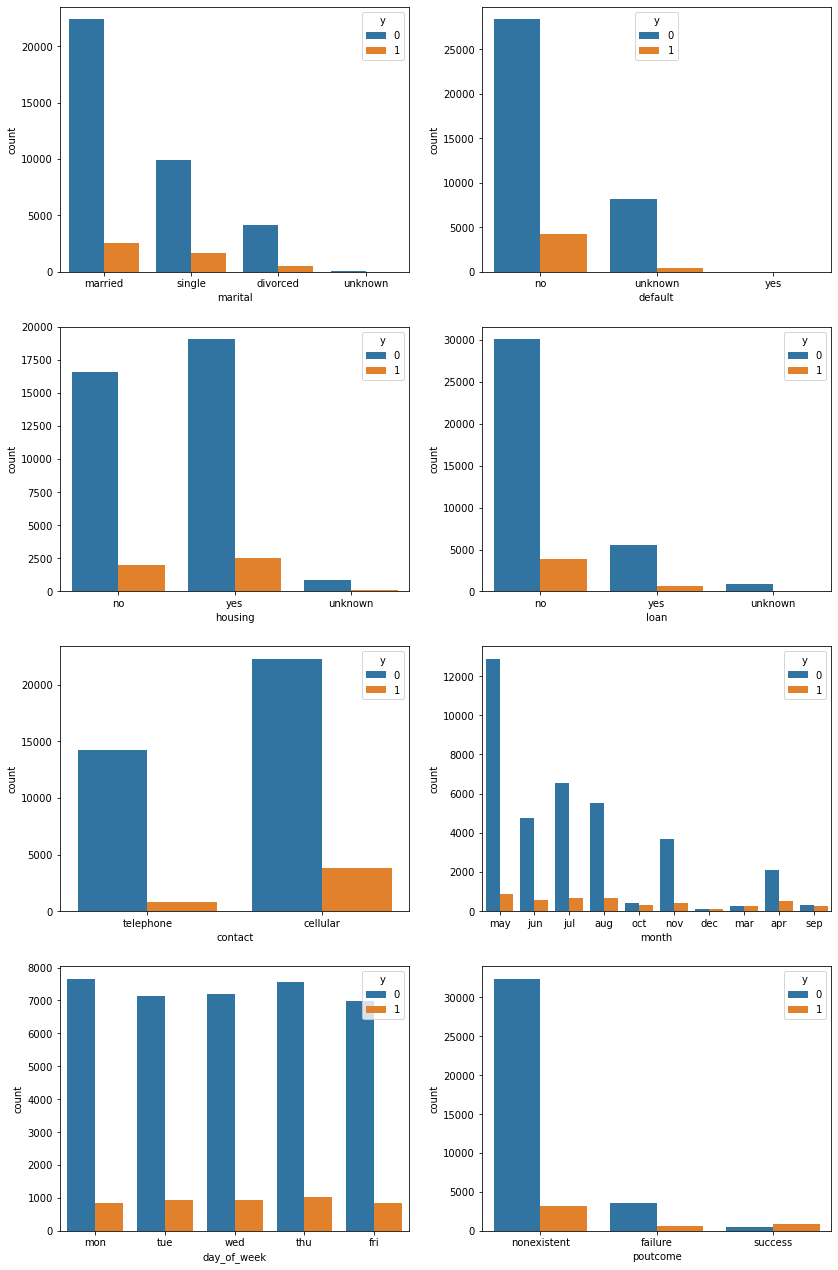

In [24]:
# Visualisasi menggunakan countplot
cols = ['marital','default','housing','loan','contact','month','day_of_week','poutcome']

fig, ax = plt.subplots(4,2,figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.countplot(data=df_bank_full, x=col, hue='y', ax=ax[i])
    
fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='job', ylabel='count'>

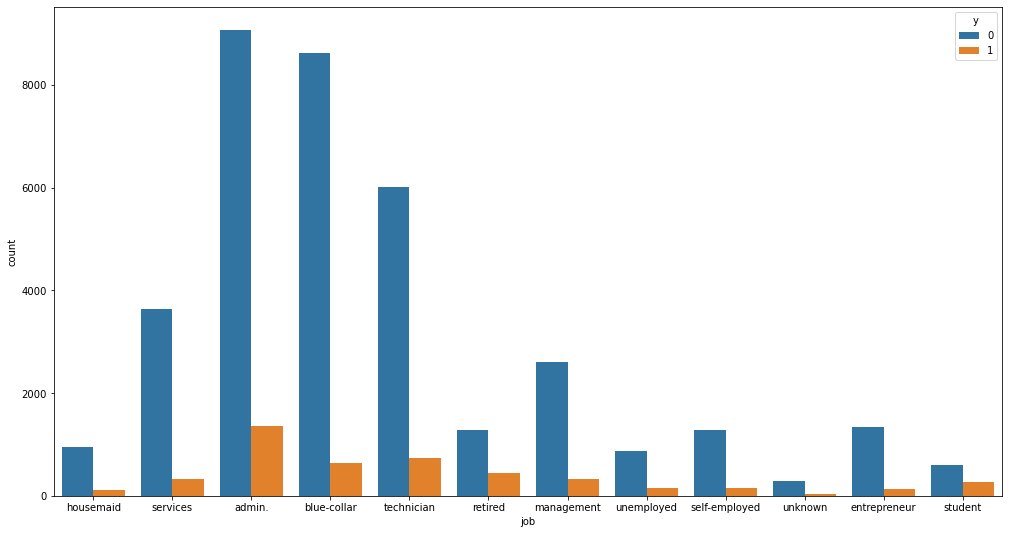

In [25]:
plt.figure(figsize=(17,9))
sns.countplot(data=df_bank_full, x='job',hue='y')

<AxesSubplot:xlabel='education', ylabel='count'>

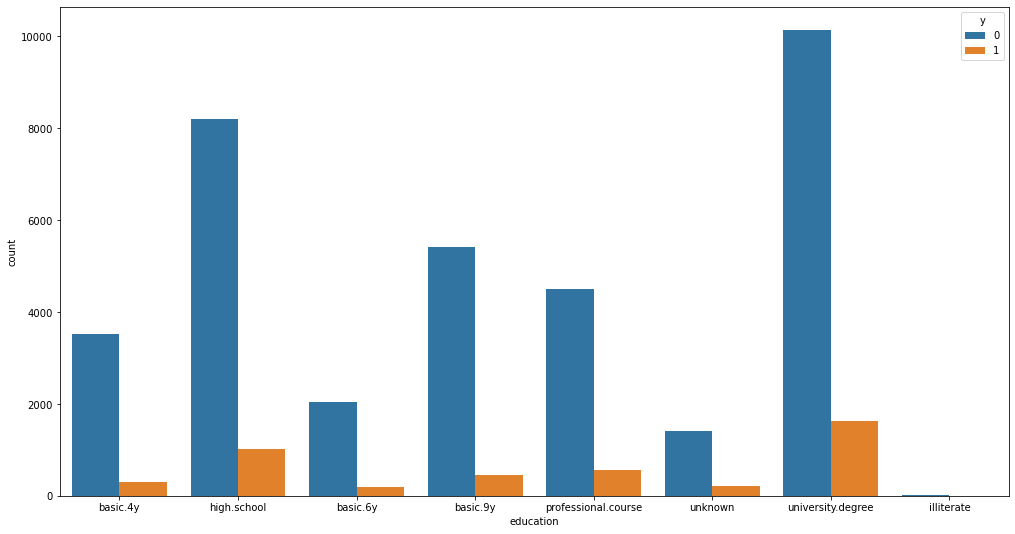

In [31]:
plt.figure(figsize=(17,9))
sns.countplot(data=df_bank_full, x='education',hue='y')

Berdasarkan plot di atas, dapat diketahui bahwa:

1. Mayoritas klien adalah klien dengan status sudah menikah, di mana kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien yang sudah menikah.
2. Mayoritas klien juga memiliki rumah. Namun, kepemilikan rumah cenderung tidak memiliki pengaruh dalam keputusan klien untuk memilih berlangganan deposito atau tidak.
3. Kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien yang tidak memiliki hutang/loan.
4. Klien yang memilih untuk berlangganan deposito juga kebanyakan bekerja dengan profesi admin.
5. Mayoritas klien memiliki tingkat pendidikan yaitu university degree.
6. Waktu kontak yang dilakukan dengan klien tidak mempengaruhi keputusan klien untuk memilih berlangganan deposito atau tidak.

## Data Preprocessing

Proses ini merupakan tahap untuk menyiapkan data sebelum proses pelatihan model prediksi klasifikasi.

## Menghapus kolom yang tidak mempengaruhi target y

Sebelumnya diketahui bahwa kolom month dan day_of_week tidak memiliki pengaruh pada variabel y. Untuk kolom Age, campaign, dan cons.conf.idx tidak dihapus dan masih akan disertakan dalam analisis karena ketiga variabel ini akan dilihat pengaruhnya berdasarkan nilai feature importance.

In [26]:
df_bank_full.drop(['month','day_of_week'], axis=1, inplace=True)

## Tidak menyertakan Outlier

In [27]:
df_bank_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Diketahui bahwa nilai maksimum pada kolom Age dan campaign memiliki perbedaan yang sangat signifikan terhadap nilai kuartil-3. Klien dengan umur 98 tahun memiliki kemungkinan sangat kecil untuk disertakan dalam kampanye ini, sehingga umur di atas 70 tahun tidak disertakan dalam analisis. Selain itu, jumlah kontak yang dihubungi lebih dari 10 juga tidak disertakan dalam analisis karena dianggap sebagai outlier.

In [28]:
df_bank_full = df_bank_full[df_bank_full['age']<70].copy()

In [29]:
df_bank_full = df_bank_full[df_bank_full['campaign']<10].copy()

In [30]:
df_bank_full.reset_index(inplace=True)

## Standarisasi Data

Standarisasi data dilakukan karena masing-masing kolom numerik tidak memiliki distribusi tertentu dan memiliki satuan yang berbeda.

In [32]:
# Standarisasi dengan StandardScaler
df_scalling = df_bank_full[['age','duration','pdays','previous','emp.var.rate','campaign',
                  'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

scaler = StandardScaler()
scaler.fit(df_scalling)
scaled_features = scaler.transform(df_scalling)
df_scalling = pd.DataFrame(scaled_features, columns= df_scalling.columns)
df_scalling.head()

,age,duration,pdays,previous,emp.var.rate,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.696628,0.001326,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
1,1.799962,-0.430076,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
2,-0.266721,-0.133487,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
3,0.043281,-0.422373,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
4,1.696628,0.178509,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776


## Encoder menggunakan pd.get_dummies pada kolom kategorik

In [33]:
df_scalling['job'] = df_bank_full['job']
df_scalling['marital'] = df_bank_full['marital']
df_scalling['education'] = df_bank_full['education']
df_scalling['default'] = df_bank_full['default']
df_scalling['housing'] = df_bank_full['housing']
df_scalling['loan'] = df_bank_full['loan']
df_scalling['contact'] = df_bank_full['contact']
df_scalling['poutcome'] = df_bank_full['poutcome']

In [34]:
# Encoder
df_new = pd.get_dummies(df_scalling)

In [35]:
df_new['y'] = df_bank_full['y']

In [36]:
df_new.head()

,age,duration,pdays,previous,emp.var.rate,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,1.696628,0.001326,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,0,1,0,0,0,1,0,1,0,0
1,1.799962,-0.430076,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,0,1,0,0,0,1,0,1,0,0
2,-0.266721,-0.133487,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,1,1,0,0,0,1,0,1,0,0
3,0.043281,-0.422373,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,0,1,0,0,0,1,0,1,0,0
4,1.696628,0.178509,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,0,0,0,1,0,1,0,1,0,0


## Splitting data

In [37]:
X = df_new.drop('y', axis=1)
y = df_new.y

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modelling

In [39]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(kernel='linear')
dct = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=200)
nb = GaussianNB()

## Training Data

In [40]:
# Logistic Regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# KNeighbors Classifier
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [42]:
# Support Vector Machine

## Mempersiapkan data
df_bank.drop_duplicates(keep='last',inplace=True)
df_bank.reset_index(inplace=True)
df_bank.drop('index',axis=1, inplace=True)
df_bank.drop(['month','day_of_week'], axis=1, inplace=True)
df_bank = df_bank[df_bank['age']<70].copy()
df_bank = df_bank[df_bank['campaign']<10].copy()
df_bank.reset_index(inplace=True)

df_bank_scalling = df_bank[['age','duration','pdays','previous','emp.var.rate','campaign',
                  'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

scaler_ = StandardScaler()
scaler_.fit(df_bank_scalling)
scaled_features_ = scaler_.transform(df_bank_scalling)
df_bank_scalling = pd.DataFrame(scaled_features_, columns = df_bank_scalling.columns)

df_bank_scalling['job'] = df_bank['job']
df_bank_scalling['marital'] = df_bank['marital']
df_bank_scalling['education'] = df_bank['education']
df_bank_scalling['default'] = df_bank['default']
df_bank_scalling['housing'] = df_bank['housing']
df_bank_scalling['loan'] = df_bank['loan']
df_bank_scalling['contact'] = df_bank['contact']
df_bank_scalling['poutcome'] = df_bank['poutcome']

df_New = pd.get_dummies(df_bank_scalling)
df_New['y'] = df_bank['y']
mapping = {'yes':1,
          'no':0}

df_New['y'] = df_bank['y'].map(mapping)

X_ = df_New.drop('y',axis=1)
y_ = df_New.y

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=0)

In [43]:
svm.fit(X_train_, y_train_)
y_pred_svm = svm.predict(X_test_)

In [44]:
# Decision Tree Classifier
dct.fit(X_train, y_train)
y_pred_dct = dct.predict(X_test)

In [45]:
# Random Forest Classifier
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [46]:
# Gaussian Naive Bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

## Evaluation Model

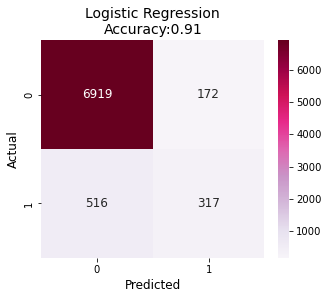

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7091
           1       0.65      0.38      0.48       833

    accuracy                           0.91      7924
   macro avg       0.79      0.68      0.72      7924
weighted avg       0.90      0.91      0.90      7924



In [47]:
# Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.2f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted",fontsize=12)
plt.ylabel("Actual",fontsize=12)
plt.show()
print("Classification Report:\n",classification_report(y_test,y_pred_lr))

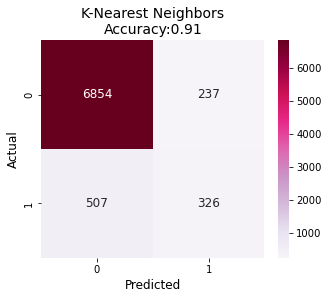

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7091
           1       0.58      0.39      0.47       833

    accuracy                           0.91      7924
   macro avg       0.76      0.68      0.71      7924
weighted avg       0.89      0.91      0.90      7924



In [48]:
# K-Nearest Neighbors
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("K-Nearest Neighbors\nAccuracy:{:.2f}".format(accuracy_score(y_test, y_pred_knn)), fontsize=14)
plt.xlabel("Predicted",fontsize=12)
plt.ylabel("Actual",fontsize=12)
plt.show()
print("Classification Report:\n",classification_report(y_test,y_pred_knn))

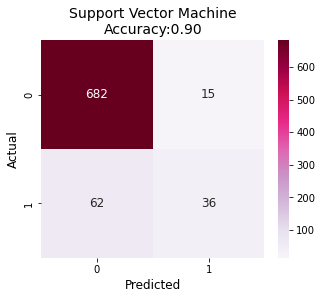

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       697
           1       0.71      0.37      0.48        98

    accuracy                           0.90       795
   macro avg       0.81      0.67      0.71       795
weighted avg       0.89      0.90      0.89       795



In [49]:
# Support Vector Machine
cm = confusion_matrix(y_test_, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Support Vector Machine\nAccuracy:{:.2f}".format(accuracy_score(y_test_, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted",fontsize=12)
plt.ylabel("Actual",fontsize=12)
plt.show()
print("Classification Report:\n",classification_report(y_test_,y_pred_svm))

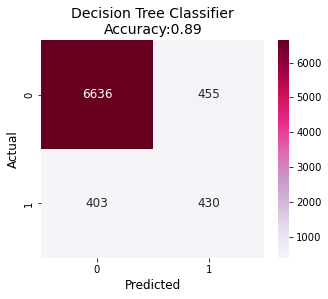

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7091
           1       0.49      0.52      0.50       833

    accuracy                           0.89      7924
   macro avg       0.71      0.73      0.72      7924
weighted avg       0.89      0.89      0.89      7924



In [50]:
# Decision Tree Classifier
cm = confusion_matrix(y_test, y_pred_dct)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Decision Tree Classifier\nAccuracy:{:.2f}".format(accuracy_score(y_test, y_pred_dct)), fontsize=14)
plt.xlabel("Predicted",fontsize=12)
plt.ylabel("Actual",fontsize=12)
plt.show()
print("Classification Report:\n",classification_report(y_test,y_pred_dct))

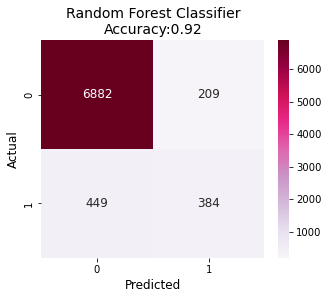

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7091
           1       0.65      0.46      0.54       833

    accuracy                           0.92      7924
   macro avg       0.79      0.72      0.75      7924
weighted avg       0.91      0.92      0.91      7924



In [51]:
# Random Forest Classifier
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest Classifier\nAccuracy:{:.2f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=14)
plt.xlabel("Predicted",fontsize=12)
plt.ylabel("Actual",fontsize=12)
plt.show()
print("Classification Report:\n",classification_report(y_test,y_pred_rf))

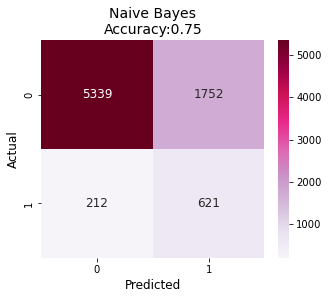

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      7091
           1       0.26      0.75      0.39       833

    accuracy                           0.75      7924
   macro avg       0.61      0.75      0.62      7924
weighted avg       0.89      0.75      0.80      7924



In [52]:
# Naive Bayes
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Naive Bayes\nAccuracy:{:.2f}".format(accuracy_score(y_test, y_pred_nb)), fontsize=14)
plt.xlabel("Predicted",fontsize=12)
plt.ylabel("Actual",fontsize=12)
plt.show()
print("Classification Report:\n",classification_report(y_test,y_pred_nb))

Berdasarkan hasil klasifikasi, diketahui bahwa semua algoritma belum memberikan performa prediksi klasifikasi yang cukup baik. Hal ini dikarenakan data yang digunakan adalah imbalanced dataset sehingga diperlukan penanganan lebih lanjut untuk kasus ini. Namun, dilihat dari masing-masing performa prediksi, algoritma Random Forest memiliki performa klasifikasi yang cenderung lebih baik dari yang lain. Nilai akurasi yang dihasilkan sebesar 0.92, nilai presisi 0.65, recall 0.48 dan f1-score 0.55.

## Features Importance

Setelah mendapatkan model prediksi klasifikasi terbaik, maka akan dicek feature importance dari data, yaitu mengetahui fitur mana saja yang paling berpengaruh untuk menentukan prediksi target.

In [54]:
data = df_new.copy()
data.drop('y', axis=1, inplace=True)
feature_names = list(data.columns.values)

In [55]:
# Memakai model Random Forest
feature_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

duration                         3.018169e-01
euribor3m                        1.119047e-01
age                              8.786724e-02
nr.employed                      5.395012e-02
campaign                         4.190788e-02
cons.conf.idx                    3.653490e-02
cons.price.idx                   3.262780e-02
pdays                            3.034908e-02
emp.var.rate                     2.676011e-02
poutcome_success                 2.021623e-02
housing_yes                      1.331807e-02
housing_no                       1.308214e-02
job_admin.                       1.252478e-02
previous                         1.237384e-02
education_university.degree      1.204896e-02
marital_married                  1.143417e-02
education_high.school            1.129088e-02
marital_single                   1.061883e-02
job_technician                   1.009450e-02
loan_no                          9.705484e-03
loan_yes                         9.076470e-03
education_professional.course    8

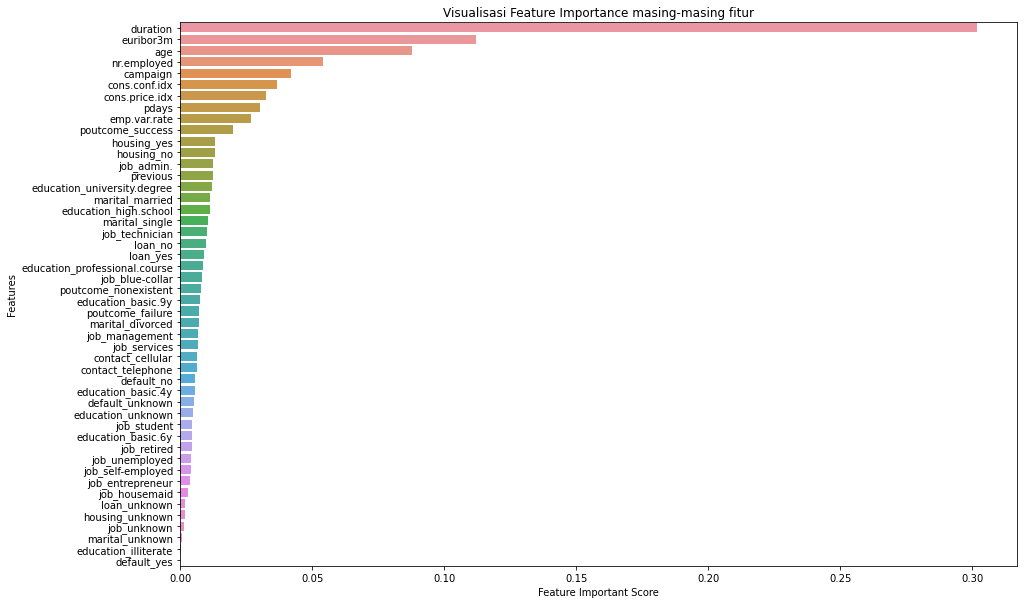

In [56]:
# Visualisasi features importance 
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Important Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Importance masing-masing fitur")

plt.show()

Berdasarkan plot di atas, kolom previous adalah kolom numerik dengan nilai feature important terendah. Namun, kolom ini tidak akan dihapus dari analisis karena korelasi yang cenderung tinggi dengan variabel targetnya. Sehingga, tidak ada variabel yang akan dihapus setelah pengecekan feature importance.



# Conclusion

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:

1. Sebagian besar klien yang ditunjuk sebagai target kampanye pemasaran bank tersebut memilih untuk tidak berlangganan deposit berjangka, yaitu sebanyak 36537 klien. Di sisi lain, terdapat 4639 klien yang memilih untuk berlangganan deposit berjangka.
2. Rata-rata umur klien yang ditunjuk sebagai target kampanye pemasaran bank adalah 40 tahun dengan umur termuda 17 tahun dan umur tertuanya adalah 98 tahun. Jumlah klien terbanyak yang ditunjuk sebagai target adalah klien yang berumur sekiar 30-40 tahun.
3. Durasi dalam telepon yang dilakukan dengan klien semakin lama, kemungkinan klien untuk memilih berlangganan deposito berjangka semakin besar, karena durasi dalam telepon memiliki korelasi paling kuat terhadap variabel y.
4. Karakteristik sosial dan ekonomi memiliki korelasi negatif dengan variabel y.
5. Mayoritas klien adalah klien dengan status sudah menikah, dengan pekerjaan mayoritas sebagai admin, tidak memiliki beban hutang, dan mempunyai gelar pendidikan university degree.
6. Algoritma Random Forest memiliki performa klasifikasi yang cenderung lebih baik dari yang lain. Nilai akurasi yang dihasilkan sebesar 0.92, nilai presisi 0.65, recall 0.48 dan f1-score 0.55.
7. Untuk meningkatkan performa prediksi klasifikasi, diperlukan penanganan pada data imbalanced dan dilakukan hypertuning parameter.